Nota: estos notebooks están basados en el trabajo de Jake VanDerPlas https://github.com/jakevdp/PythonDataScienceHandbook. Bajo licencia CC0.

# Series

Pandas está basado en [Numpy](http://www.numpy.org/), un modulo de Python diseñado para procesar rápidamente datos numéricos.
Una serie es una colección de valores, representa la información como una columna. 

In [1]:
import pandas as pd

In [3]:
pd.Series

In [2]:
ciudades = ['Santiago', 'Concepción', 'Valparaíso']
pd.Series(ciudades)

0      Santiago
1    Concepción
2    Valparaíso
dtype: object

Pandas detecta automáticamente el tipo de los datos:

In [2]:
numeros = [1, 2, 3] # son números enteros
pd.Series(numeros)

0    1
1    2
2    3
dtype: int64

In [3]:
ciudades = ['Santiago', 'Concepción', None] # None es un valor sin tipo
pd.Series(ciudades)

0      Santiago
1    Concepción
2          None
dtype: object

In [5]:
numeros = [1, 2, None] 
pd.Series(numeros)     # Serie de números flotantes

0    1.0
1    2.0
2    NaN
dtype: float64

NaN (Not a Number) indica que el número no está definido. Debes tratarlo de manera especial:

In [4]:
import numpy as np
np.nan == None  # debería devolver True or False?

False

In [5]:
np.nan == np.nan  # debería devolver True or False?

False

In [6]:
np.isnan(np.nan)  # forma correcta de comparar... ya volveremos a esto :)

True

Podemos crear series especificando explícitamente el índice y los datos: 

In [9]:
s = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
s

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [10]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [11]:
s.values

array([ 0.25,  0.5 ,  0.75,  1.  ])

Y también asignarlos con un diccionario:

In [7]:
diccionario = {'nombre':'diego', 'apellido':'caro'}

In [8]:
diccionario['nombre']

'diego'

In [12]:
s = pd.Series({'a':0.25, 'b': 0.5, 'c': 0.75, 'd':1.0})
s

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

## Consultando series

In [13]:
s.iloc[2] # retorna el i-ésimo elemento de la serie

0.75

In [14]:
s.iloc[1:3] # retorna un rango [i:j] (no incluye el j-ésimo)

b    0.50
c    0.75
dtype: float64

In [15]:
s.loc['c'] # busca por valor en índice

0.75

In [16]:
s.loc['b':'c']

b    0.50
c    0.75
dtype: float64

In [17]:
s[2] # búsqueda implícita sobre el índice, Pandas lo puede interpretar como un valor de índice o una posición, ojo!

0.75

In [18]:
s['c'] # búsqueda implícita, ojo, fuente de confusión!

0.75

In [9]:
ciudades = pd.Series(['Santiago', 'Concepción', 'Valparaíso'], index = [97, 98, 99], name='Ciudades')
ciudades

97      Santiago
98    Concepción
99    Valparaíso
Name: Ciudades, dtype: object

In [10]:
ciudades[0] # esto no devuelve .iloc[0], hace error :(

KeyError: 0

Los elementos de una serie también se pueden recorrer:

In [11]:
numeros = pd.Series([6.5, 7, 3.3, 4.1])

In [22]:
suma_total = 0
for item in numeros:
    suma_total += item
suma_total

20.899999999999999

In [26]:
np.sum(numeros)

28.899999999999999

In [14]:
numeros

0    6.5
1    7.0
2    3.3
3    4.1
dtype: float64

In [13]:
numeros * 2

0    13.0
1    14.0
2     6.6
3     8.2
dtype: float64

In [28]:
numeros = numeros + 2 # suma 2 unidades a cada elemento de la serie
numeros

0    10.5
1    11.0
2     7.3
3     8.1
dtype: float64

In [15]:
numeros + numeros

0    13.0
1    14.0
2     6.6
3     8.2
dtype: float64

Nota sobre Numpy. (Pero no preocuparse demasiado del performance por ahora... solo cuando sea crítico para el negocio)

In [16]:
#this creates a big series of random numbers
s = pd.Series(np.random.randint(0,1000,10000))
s.head() # muestra las primeras filas

0     52
1    990
2    426
3    973
4    831
dtype: int64

In [17]:
%%timeit -n 100
summary = 0
for item in s:
    summary+=item

100 loops, best of 3: 1.19 ms per loop


In [18]:
%%timeit -n 100
summary = np.sum(s) # útil para machine learning!

100 loops, best of 3: 108 µs per loop


# Dataframe
Es una colección de Series, y representa una tabla (si, como las de Excel).

In [20]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


Se puede acceder a la serie usando el operador [] y como un atributo:

In [21]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [22]:
data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [23]:
type(data['area'])

pandas.core.series.Series

In [29]:
data['area'] * -1

California   -423967
Florida      -170312
Illinois     -149995
New York     -141297
Texas        -695662
Name: area, dtype: int64

In [24]:
# puedes asignar nuevas columnas
data['density'] = data['pop'] / data['area'] # osom, no?
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


También se puede seleccionar un subconjunto de columnas por nombre:

In [25]:
data[['area','density']]

,area,density
California,423967,90.413926
Florida,170312,114.806121
Illinois,149995,85.883763
New York,141297,139.076746
Texas,695662,38.018740


In [32]:
data.T # también se pueden trasponer el dataframe

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
pop,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644819e+07
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801874e+01


In [33]:
data.T.loc['area']

California    423967.0
Florida       170312.0
Illinois      149995.0
New York      141297.0
Texas         695662.0
Name: area, dtype: float64

Los dataframes también tienen un indice y valores:

In [26]:
data.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [28]:
data.values

array([[  4.23967000e+05,   3.83325210e+07,   9.04139261e+01],
       [  1.70312000e+05,   1.95528600e+07,   1.14806121e+02],
       [  1.49995000e+05,   1.28821350e+07,   8.58837628e+01],
       [  1.41297000e+05,   1.96511270e+07,   1.39076746e+02],
       [  6.95662000e+05,   2.64481930e+07,   3.80187404e+01]])

Los operadores .iloc y .loc funcionan de la misma manera, pero también pueden devolver columnas:

In [36]:
data.iloc[0:3] # se pueden seleccionar filas [i:j]

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [37]:
data.iloc[0:3, 1:3] # y también se puede seleccionar por columnas, por ejemplo las columnas 1 y 2

,pop,density
California,38332521,90.413926
Florida,19552860,114.806121
Illinois,12882135,85.883763


In [38]:
data.loc['California']

area       4.239670e+05
pop        3.833252e+07
density    9.041393e+01
Name: California, dtype: float64

In [29]:
data.loc['California':'Illinois', 'area':'pop']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


También puedes borrar filas y columnas, con axis = 0 se indican filas, con axis = 1 se indican columnas.

In [31]:
copy_data = data.copy()
copy_data.drop?

In [32]:
copy_data = copy_data.drop(['Florida'], axis = 0)
copy_data

,area,pop,density
California,423967,38332521,90.413926
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


In [33]:
copy_data = copy_data.drop(['area'], axis='columns')  # también puedes usar axis = 'columns'
copy_data

,pop,density
California,38332521,90.413926
Illinois,12882135,85.883763
New York,19651127,139.076746
Texas,26448193,38.018740


In [34]:
copy_data.values

array([[  3.83325210e+07,   9.04139261e+01],
       [  1.28821350e+07,   8.58837628e+01],
       [  1.96511270e+07,   1.39076746e+02],
       [  2.64481930e+07,   3.80187404e+01]])

In [ ]:
# Python
dict, list, str


In [ ]:
# Pandas
pd.Series
pd.Dataframes


## Cargando y filtrando datos

Pandas también puede abrir varios tipos de archivo, por ahora nos quedarmos con los archivos separados por coma (csv). Más info sobre otro formatos (excel, json, xml...) en https://pandas.pydata.org/pandas-docs/stable/io.html 

(Extra: La desigualdad en los ingresos se puede cuantificar a través del Coeficiente de Gini. Este coeficiente varía entre 0 y 1, donde 0 indica igualdad absoluta y 1 desigualdad absoluta (fuente: http://stats.oecd.org/Index.aspx?DataSetCode=IDD).)

In [50]:
df = pd.read_csv('gini_by_year.csv')
df.head()

,Australia,1981,0.31329999999999997
0,Brazil,1981,0.5793
1,Canada,1981,0.3260
2,Costa Rica,1981,0.4749
3,Ethiopia,1981,0.3242
4,Thailand,1981,0.4522


In [44]:
df.columns #something went wrong...?

Index(['Australia', '1981', '0.31329999999999997'], dtype='object')

Por defecto se asume que la primera línea contiene el nombre de las columnas. Si no los tiene, se pueden especificar:

In [45]:
df = pd.read_csv('gini_by_year.csv',names=['pais','anio','gini'])
df.head()

,pais,anio,gini
0,Australia,1981,0.3133
1,Brazil,1981,0.5793
2,Canada,1981,0.3260
3,Costa Rica,1981,0.4749
4,Ethiopia,1981,0.3242


In [13]:
df.columns

Index(['pais', 'anio', 'gini'], dtype='object')

In [18]:
df.pais.unique() #cuantos paises hay en el archivo?

array(['Australia', 'Brazil', 'Canada', 'Costa Rica', 'Ethiopia',
       'Thailand', 'Uruguay', 'Venezuela, RB', 'Bangladesh', 'Morocco',
       'Mexico', 'Malaysia', 'Nepal', 'Rwanda', 'Botswana',
       "Cote d'Ivoire", 'Sri Lanka', 'Nigeria', 'Peru', 'Philippines',
       'Poland', 'Tunisia', 'Argentina', 'Dominican Republic', 'Guatemala',
       'Honduras', 'Iran, Islamic Rep.', 'Israel', 'Lesotho',
       'United States', 'Chile', 'Ecuador', 'Ghana', 'Hungary',
       'Mauritania', 'Pakistan', 'Slovenia', 'Turkey', 'Belarus',
       'Colombia', 'Czech Republic', 'Estonia', 'Croatia', 'Jamaica',
       'Kazakhstan', 'Kyrgyz Republic', 'Lithuania', 'Latvia', 'Moldova',
       'Russian Federation', 'Slovak Republic', 'Turkmenistan',
       'Trinidad and Tobago', 'Ukraine', 'Uzbekistan', 'Bulgaria',
       'Panama', 'Romania', 'Uganda', 'Bolivia', 'Paraguay', 'Guinea',
       'Senegal', 'El Salvador', 'Tanzania', 'Zambia', 'Burundi',
       'Central African Republic', 'Kenya', 'Lao PD

En una serie se puede preguntar cuales filas cumplen una condición. Retorna una lista de True/False, que indica los elementos de la serie que cumplen la condición.

In [21]:
df.pais == 'Australia'

0        True
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17       True
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1238    False
1239    False
1240    False
1241    False
1242    False
1243    False
1244    False
1245    False
1246    False
1247    False
1248    False
1249    False
1250    False
1251    False
1252    False
1253    False
1254    False
1255    False
1256    False
1257    False
1258    False
1259    False
1260    False
1261    False
1262    False
1263    False
1264    False
1265    False
1266    False
1267    False
Name: pais, Length: 1268, dtype: bool

Con el operador corchete [ ] podemos devolver las filas que cumplen la condición.

In [23]:
df[df.pais == 'Chile']

,pais,anio,gini
42,Chile,1987,0.5621
96,Chile,1990,0.5725
128,Chile,1992,0.5481
181,Chile,1994,0.5643
234,Chile,1996,0.5487
293,Chile,1998,0.5552
368,Chile,2000,0.5559
507,Chile,2003,0.5461
699,Chile,2006,0.5179
916,Chile,2009,0.5200


¿Cuáles son los países con coeficiente de Gini menor a 0.25?

In [15]:
df[df.gini < 0.25]

,pais,anio,gini
46,Hungary,1987,0.2096
51,Slovenia,1987,0.2360
55,Belarus,1988,0.2276
59,Czech Republic,1988,0.1940
60,Estonia,1988,0.2297
62,Croatia,1988,0.2278
66,Lithuania,1988,0.2248
67,Latvia,1988,0.2249
68,Moldova,1988,0.2414
70,Russian Federation,1988,0.2380


In [16]:
menos_desiguales = df[df.gini < 0.25]
len(menos_desiguales)

36

Las condiciones se pueden mezclar con el operador or, and y not.

| Operación | Python (`if`) | Pandas |
|-----------|--------------|-----------|
| Disyunción | or | &#124; |
| Conjunción | and | & |
| Negación | not | ~ |

Pregunta: ¿ Cuáles son los países con Gini menos a 0.25 y mayores a 0.5?

In [17]:
extremos = df[(df.gini < 0.25) | (df.gini > 0.5)] # se puede usar 
extremos

,pais,anio,gini
1,Brazil,1981,0.5793
7,"Venezuela, RB",1981,0.5561
8,Brazil,1982,0.5842
10,Brazil,1983,0.5899
11,Brazil,1984,0.5838
19,Brazil,1985,0.5559
20,Botswana,1985,0.5421
29,Brazil,1986,0.5846
33,Guatemala,1986,0.5826
34,Honduras,1986,0.5509


¿Y cuales están entre 0.25 y 0.5?

In [58]:
noextremos = df[(df.gini > 0.25) & (df.gini < 0.5)]
noextremos.head()

,pais,gini
0,Slovenia,0.251
1,Denmark,0.256
3,Czech Republic,0.257
5,Norway,0.257
6,Finland,0.257


In [59]:
noextremos.shape # (num. filas, num. columnas)

(38, 2)

In [60]:
noextremos.tail()

,pais,gini
35,Switzerland,0.297
36,United States,0.394
37,Brazil,0.470
39,India,0.495
40,Russia,0.376


# Manejando valores nulos

El mundo real no es perfecto. Usualmente los datos que encontramos en portales públicos o en nuestra institución no cumplen con la especificación, e incluso le podrían faltar entradas. Ahora veremos como trabajar cuando faltan datos.

In [64]:
serie = pd.Series([1, np.nan, 'hello', None])
serie

0        1
1      NaN
2    hello
3     None
dtype: object

In [65]:
serie.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [66]:
serie[serie.notnull()]

0        1
2    hello
dtype: object

In [67]:
serie.dropna()

0        1
2    hello
dtype: object

In [88]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]], columns=['a','b','c'])
df

,a,b,c
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [69]:
df.dropna()

,a,b,c
1,2.0,3.0,5


**Importante**: antes de eliminar filas, debes reflexionar sobre el efecto que tendrá sobre lo que representan tus datos. Guíate por estas preguntas:
* ¿Por qué esta esta columna tiene algunos valores nulos? ¿Será que el proceso que genera los datos no se realizó? no hay suficiente precisión?
* Si elimino una fila, estoy eliminando valores que no son nulos en otra columna? ¿Estoy sesgando los datos en la otra columna? Quizás es importante no eliminarlos en la otra serie.

In [70]:
df['basura'] = np.nan
df

,a,b,c,basura
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [71]:
# eliminar columnas que tengan todos los valores nulos
df.dropna(axis='columns', how='all') 

,a,b,c
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


También podemos asignar valores a los nulos:

In [72]:
df.fillna(0)

,a,b,c,basura
0,1.0,0.0,2,0.0
1,2.0,3.0,5,0.0
2,0.0,4.0,6,0.0


In [73]:
# forward-fill: propagar el valor previo hacia la siguiente fila
df.fillna(method='ffill') # también se puede propagar la anteror: 'bfill

,a,b,c,basura
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


In [74]:
df.fillna?

**Nota**: operaciones aritméticas ignoran los valores nulos:

In [89]:
df['b']

0    NaN
1    3.0
2    4.0
Name: b, dtype: float64

In [90]:
df['b'].sum()

7.0

In [91]:
np.sum(df['b'])

7.0

# Operaciones sobre Dataframes
Pandas incorpora operaciones estadísticas básicas sobre series. Ver vás en https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics 

In [54]:
df = pd.read_csv('gini_by_year.csv',names=['country','year','gini']) # asignar nombres a columnas, si no los tiene
df.head()

,country,year,gini
0,Australia,1981,0.3133
1,Brazil,1981,0.5793
2,Canada,1981,0.3260
3,Costa Rica,1981,0.4749
4,Ethiopia,1981,0.3242


In [55]:
df.gini.mean(), df.gini.std(), df.gini.median()

(0.3983231072555205, 0.10032676522644897, 0.38425)

In [56]:
df.describe()

,year,gini
count,1268.000000,1268.000000
mean,2003.068612,0.398323
std,7.611265,0.100327
min,1981.000000,0.162300
25%,1998.000000,0.317175
50%,2005.000000,0.384250
75%,2009.000000,0.475250
max,2014.000000,0.657600


### Ordenar

In [57]:
df_sorted = df.sort_values('gini',ascending=True) # o puede ser ascending=False
df_sorted.head()

,country,year,gini
548,Azerbaijan,2004,0.1623
620,Azerbaijan,2005,0.1664
447,Azerbaijan,2002,0.1736
499,Azerbaijan,2003,0.1881
59,Czech Republic,1988,0.1940


In [58]:
df_sorted.tail()

,country,year,gini
523,Namibia,2003,0.6332
1127,South Africa,2011,0.6338
451,Botswana,2002,0.6473
759,South Africa,2006,0.6479
277,Malawi,1997,0.6576


## Contar

In [59]:
df.country.value_counts() #retorna una serie

Brazil                   30
Costa Rica               28
Honduras                 26
Argentina                26
Poland                   22
Uruguay                  22
Panama                   21
Peru                     20
Belarus                  20
Moldova                  20
El Salvador              20
Thailand                 19
Russian Federation       19
Dominican Republic       19
Romania                  19
Georgia                  19
Ukraine                  19
Colombia                 19
Lithuania                18
Paraguay                 18
Ecuador                  18
Kyrgyz Republic          18
Hungary                  18
Bolivia                  17
Latvia                   17
Estonia                  17
Kazakhstan               16
Armenia                  16
Mexico                   15
Turkey                   14
                         ..
Haiti                     2
Cabo Verde                2
Sao Tome and Principe     2
Maldives                  2
Sierra Leone        

### Graficar

In [ ]:
%matplotlib inline

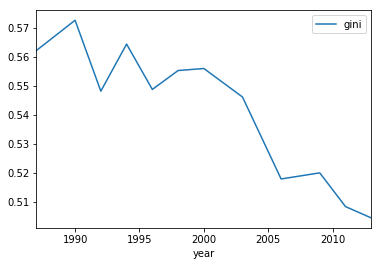

In [69]:
df[df.country=='Chile'].plot(x='year',y='gini')

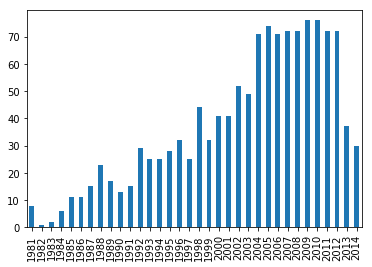

In [66]:
df.year.value_counts().sort_index().plot(kind='bar')

# Tidy data
Tidy data mantra:
* Cada variable medida debe estar en una columna.
* Cada observación debe estar en una fila.
* Debería existir una tabla por cada variable. Recuerda incluir una columna que permita linkearlas.

En este dataset hay dos observaciones en cada fila, tratamiento A y tratamiento B. Imaginemos que el valor obtenido de cada tratamiento es el tiempo que demora en actuar una medicina.

In [100]:
messy = pd.DataFrame({'First' : ['John', 'Jane', 'Mary'], 
                      'Last' : ['Smith', 'Doe', 'Johnson'], 
                      'Treatment A' : [np.nan, 16, 3], 
                      'Treatment B' : [2, 11, 1]})
messy

,First,Last,Treatment A,Treatment B
0,John,Smith,NaN,2
1,Jane,Doe,16.0,11
2,Mary,Johnson,3.0,1


Esta forma de mostrar los datos permite comparar fácilmente ambos tratamientos. Por ejemplo,  ¿Cuánto tiempo (en promedio) toma el tratamiento b?

In [106]:
messy['Treatment B'].mean()

4.666666666666667

Pero no estan sencillo saber cuántos tratamientos se lograron aplicar:

In [125]:
len(messy[messy['Treatment A'].notnull()]) + len(messy[messy['Treatment B'].notnull()])

5

**Pregunta**: Si existieran 100 tratamientos, ¿cuántas líneas de código necesitaríamos para saber cuántos tratamientos se aplicaron?

La función `.melt(...)` permite re-formatear dataframes. Requiere que identifiquemos los valores que representan una observación. En este caso, una observación está compuesta por el nombre y apellido de una persona, y un tratamiento:

In [118]:
tidy = pd.melt(messy, 
               id_vars=['First','Last'],
               var_name='treatment', 
               value_name='result') # nombre de la variable que se mide para cada treatment
tidy

,First,Last,treatment,result
0,John,Smith,Treatment A,NaN
1,Jane,Doe,Treatment A,16.0
2,Mary,Johnson,Treatment A,3.0
3,John,Smith,Treatment B,2.0
4,Jane,Doe,Treatment B,11.0
5,Mary,Johnson,Treatment B,1.0


In [124]:
len(tidy[tidy.result.notnull()])

5

Notar que no depende del número de tratamientos :)